<font> Imports for this code </font>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import math
from IPython.display import HTML, display
%matplotlib inline

<font>Functions for the project are in the sections below.</font>

In [5]:
def taxifileReader(filename,sortCol,startDate,endDate):
    temp = pd.read_csv(filename)
    temp[startDate]=pd.to_datetime(temp[startDate],format='%d%b%y:%X')
    temp[endDate]=pd.to_datetime(temp[endDate],format='%d%b%y:%X')
    temp = temp.sort_values(sortCol)
    return temp

In [6]:
def fileReader(filename,sortCol,date):
    temp = pd.read_csv(filename)
    temp[date]=pd.to_datetime(temp[date],format='%m/%d/%Y')
    temp=temp[(pd.DatetimeIndex(temp[date]).year == 2013) | (pd.DatetimeIndex(temp[date]).year == 2014) |
                  (pd.DatetimeIndex(temp[date]).year == 2015) | (pd.DatetimeIndex(temp[date]).year == 2016) | 
                  (pd.DatetimeIndex(temp[date]).year == 2017)]
    temp = temp.sort_values(sortCol)
    return temp

In [7]:
def mapMaker(year,month,*args):
    folium_map = folium.Map(location=[41.878113, -87.629799],
                        zoom_start=13,
                        tiles='Stamen Toner')
    
    colorList = ['Blue','Yellow','Green','Red','Pink']
    colorCount=0
    
    for entry in args:
        lat = list(entry['pickup_lat'][(pd.DatetimeIndex(entry['trip_start']).year == year) & 
                              (pd.DatetimeIndex(entry['trip_start']).month == month)])
        long = list(entry['pickup_long'][(pd.DatetimeIndex(entry['trip_start']).year == year) & 
                                (pd.DatetimeIndex(entry['trip_start']).month == month)])
        
        length=len(lat)
        pos=0


        while pos < length:
            if not math.isnan(lat[pos]) and not math.isnan(long[pos]):
                temp1=str(lat[pos])
                temp2=str(long[pos])
                popup=temp1+', '+temp2
                marker = folium.CircleMarker(location=[lat[pos], long[pos]],
                                             color=colorList[colorCount],fill=True)
                marker.add_to(folium_map)
            pos+=1
        colorCount += 1
    return folium_map

In [52]:
def countOccurences(season,dateCol,*args):
    
    month=[]
    
    if season.lower() == 'spring': months=[3,4,5]
    elif season.lower() =='summer': months=[6,7,8]
    elif season.lower() == 'fall': months=[9,10,11]
    elif season.lower() == 'winter': months=[12,1,2]
    
    occurences=[]
    
    for df in args:
        totalOccurences=0
        
        for month in months:
            totalOccurences+=df[dateCol][(pd.DatetimeIndex(df[dateCol]).month == month)].count()
            
        occurences.append(totalOccurences/5)
    
    occurences.append(sum(occurences))
        
    return occurences
        

In [54]:
def countBTOccurences(season,dateCol,numrider,*args):
    
    month=[]
    
    if season.lower() == 'spring': months=[3,4,5]
    elif season.lower() =='summer': months=[6,7,8]
    elif season.lower() == 'fall': months=[9,10,11]
    elif season.lower() == 'winter': months=[12,1,2]
    
    occurences=[]
    
    for df in args:
        totalOccurences=0
        
        for month in months:
            totalOccurences+=df[numrider][(pd.DatetimeIndex(df[dateCol]).month == month)].sum()
            
        occurences.append(totalOccurences/5)
    
    occurences.append(sum(occurences))
        
    return occurences

In [47]:
def sumstat(dateCol,colName,mean=True,mx=True,mn=True,*args):
    result=[]
    for entry in args:
        result.append(entry['company'].head(1))
        if mean:
            result.append('mean')
            result.append(entry[colName].groupby(pd.DatetimeIndex(entry[dateCol]).year).mean())
        if mx:
            result.append('max')
            result.append(entry[colName].groupby(pd.DatetimeIndex(entry[dateCol]).year).max())
        if mn:
            result.append('min')
            result.append(entry[colName].groupby(pd.DatetimeIndex(entry[dateCol]).year).min()) 
    return result

<font> CSV Imports using functions defined above</font>

In [10]:
NWCab = taxifileReader('N&W Cab Co.csv','trip_start','trip_start','trip_end')
BennyJona = taxifileReader('Benny Jona.csv','trip_start','trip_start','trip_end')
CDCab=taxifileReader('C&D Cab Inc.csv','trip_start','trip_start','trip_end')
Zeymane=taxifileReader('Zeymane Corp.csv','trip_start','trip_start','trip_end')
train = fileReader('CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv','date','date')
bus = fileReader('CTA_-_Ridership_-_Bus_Routes_-_Daily_Totals_by_Route.csv','date','date')

<font>Graph displaying the density of taxi pickups for the 4 companies chosen in Chicago</font>

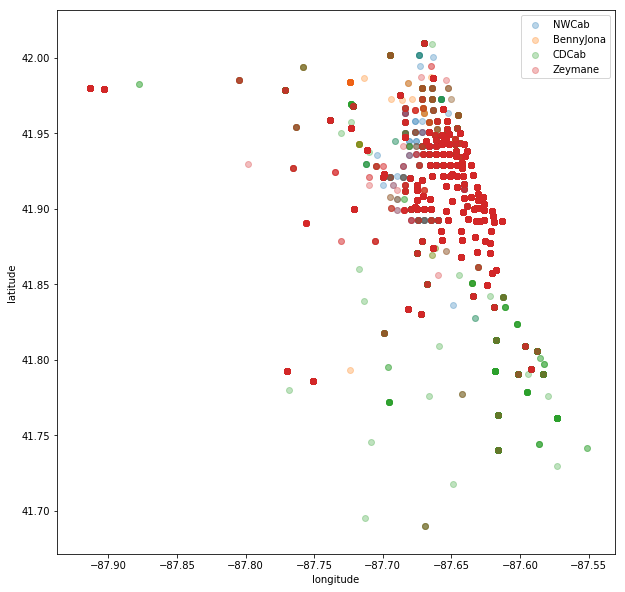

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.scatter(NWCab['pickup_long'], NWCab['pickup_lat'],alpha=0.3)
plt.scatter(BennyJona['pickup_long'],BennyJona['pickup_lat'],alpha=0.3)
plt.scatter(CDCab['pickup_long'],CDCab['pickup_lat'],alpha=0.3)
plt.scatter(Zeymane['pickup_long'],Zeymane['pickup_lat'],alpha=0.3)
legend=ax.legend(['NWCab','BennyJona','CDCab','Zeymane'])
plt.xlabel('longitude');
plt.ylabel('latitude');

<font>Map displaying taxi pick ups for June of 2013, can be adjusted in the code below. </font>

In [12]:
mapMaker(2013,6,NWCab,BennyJona,CDCab,Zeymane)

<font>Counts of the number of taxi rides given in the seasons of years 2013-2017 for taxis, buses and trains.</font>

In [61]:
winter=countOccurences('winter','trip_start',NWCab,BennyJona,CDCab,Zeymane)
fall=countOccurences('fall','trip_start',NWCab,BennyJona,CDCab,Zeymane)
summer=countOccurences('summer','trip_start',NWCab,BennyJona,CDCab,Zeymane)
spring=countOccurences('spring','trip_start',NWCab,BennyJona,CDCab,Zeymane)
season_cab_avg=pd.DataFrame(data=[winter,fall,summer,spring],columns=['NWCab','BennyJona','CDCab','Zeymane','combined_total'])
season_cab_avg

,NWCab,BennyJona,CDCab,Zeymane,combined_total
0,981.4,594.4,1102.6,781.2,3459.6
1,1169.6,692.8,2020.6,872.2,4755.2
2,1196.6,942.0,1653.6,873.8,4666.0
3,1386.2,946.4,1085.6,952.6,4370.8


In [60]:
winter=countBTOccurences('winter','date','rides',bus,train)
fall=countBTOccurences('fall','date','rides',bus,train)
summer=countBTOccurences('summer','date','rides',bus,train)
spring=countBTOccurences('spring','date','rides',bus,train)
season_bt_avg=pd.DataFrame(data=[winter,fall,summer,spring],columns=['bus','train','combined_total'])
season_bt_avg

,bus,train,combined_total
0,63079636.4,43446105.0,106525741.4
1,69627881.6,50650502.8,120278384.4
2,66703475.8,50097233.6,116800709.4
3,70304181.4,48565391.4,118869572.8


In [51]:
train['rides'].groupby(train['stationname']).sum().sort_values(ascending=False).head(10)

stationname
Lake/State             33005335
Clark/Lake             29109062
Chicago/State          25807066
Belmont-North Main     21443534
Grand/State            20724339
Fullerton              20631749
Roosevelt              19292052
O'Hare Airport         18985780
Washington/Dearborn    17969072
Monroe/State           16484892
Name: rides, dtype: int64

In [49]:
bus['rides'].groupby(bus['route']).sum().sort_values(ascending=False).head(10)

route
79    42101744
9     39949681
66    37362751
49    34787032
77    34433113
4     33515029
8     33493065
53    30752847
22    30522205
3     30108417
Name: rides, dtype: int64

In [25]:
#Compare percentages of cash vs credit cards
#Count people who left a tip and those who did not in cash vs credit cards
#Check to see which days of the week had the highest volume of customers (bus, train, and taxi)

In [65]:
sumstat('trip_start','fare',True,True,True,Zeymane,NWCab,CDCab,BennyJona)

[13868    2192 - Zeymane Corp
 Name: company, dtype: object, 'mean', trip_start
 2013    10.262389
 2014    10.000526
 2015    10.216266
 2016    14.480104
 2017    15.103855
 Name: fare, dtype: float64, 'max', trip_start
 2013    106.85
 2014    108.85
 2015     73.85
 2016    100.25
 2017    100.75
 Name: fare, dtype: float64, 'min', trip_start
 2013    0.0
 2014    0.0
 2015    0.0
 2016    0.0
 2017    0.0
 Name: fare, dtype: float64, 19729    1085 - N and W Cab Co
 Name: company, dtype: object, 'mean', trip_start
 2013    8.863207
 2014    8.465043
 2015    8.619535
 2016    9.262288
 2017    9.057565
 Name: fare, dtype: float64, 'max', trip_start
 2013    96.85
 2014    75.45
 2015    73.25
 2016    51.75
 2017    84.50
 Name: fare, dtype: float64, 'min', trip_start
 2013    0.00
 2014    3.25
 2015    0.00
 2016    2.25
 2017    0.00
 Name: fare, dtype: float64, 28642    3201 - CID Cab Co Inc
 Name: company, dtype: object, 'mean', trip_start
 2013    10.978900
 2014    10.655518

In [80]:
print((NWCab['payment_type']=='Cash').sum())
print((BennyJona['payment_type']=='Cash').sum())
print((CDCab['payment_type']=='Cash').sum())
print((Zeymane['payment_type']=='Cash').sum())

15993
9221
16468
10585


In [81]:
print((NWCab['payment_type']=='Credit Card').sum())
print((BennyJona['payment_type']=='Credit Card').sum())
print((CDCab['payment_type']=='Credit Card').sum())
print((Zeymane['payment_type']=='Credit Card').sum())

7532
6623
9628
6778


In [82]:
print(NWCab['tips'][NWCab['payment_type']=='Cash'].mean())
print(BennyJona['tips'][BennyJona['payment_type']=='Cash'].mean())
print(CDCab['tips'][CDCab['payment_type']=='Cash'].mean())
print(Zeymane['tips'][Zeymane['payment_type']=='Cash'].mean())

0.0
0.00032534432274156815
0.0
0.0


In [84]:
print(NWCab['tips'][NWCab['payment_type']=='Cash'].max())
print(BennyJona['tips'][BennyJona['payment_type']=='Cash'].max())
print(CDCab['tips'][CDCab['payment_type']=='Cash'].max())
print(Zeymane['tips'][Zeymane['payment_type']=='Cash'].max())

0.0
3.0
0.0
0.0


In [85]:
print(NWCab['tips'][NWCab['payment_type']=='Cash'].min())
print(BennyJona['tips'][BennyJona['payment_type']=='Cash'].min())
print(CDCab['tips'][CDCab['payment_type']=='Cash'].min())
print(Zeymane['tips'][Zeymane['payment_type']=='Cash'].min())

0.0
0.0
0.0
0.0


In [86]:
print(NWCab['tips'][NWCab['payment_type']=='Credit Card'].mean())
print(BennyJona['tips'][BennyJona['payment_type']=='Credit Card'].mean())
print(CDCab['tips'][CDCab['payment_type']=='Credit Card'].mean())
print(Zeymane['tips'][Zeymane['payment_type']=='Credit Card'].mean())

2.520439458311197
4.391002566812625
2.821239094308255
3.2212024195927924


In [88]:
print(NWCab['tips'][NWCab['payment_type']=='Credit Card'].max())
print(BennyJona['tips'][BennyJona['payment_type']=='Credit Card'].max())
print(CDCab['tips'][CDCab['payment_type']=='Credit Card'].max())
print(Zeymane['tips'][Zeymane['payment_type']=='Credit Card'].max())

55.0
42.0
50.0
40.04


In [87]:
print(NWCab['tips'][NWCab['payment_type']=='Credit Card'].min())
print(BennyJona['tips'][BennyJona['payment_type']=='Credit Card'].min())
print(CDCab['tips'][CDCab['payment_type']=='Credit Card'].min())
print(Zeymane['tips'][Zeymane['payment_type']=='Credit Card'].min())

0.0
0.0
0.0
0.0
